# Capítulo 5: Metodología

En esta _notebook_ se encuentran algunos de los procesos descritos en el 
**Capítulo 5: Metodología. Sección 5.**

## Análisis Exploratorio de Datos

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('font', family='serif')
plt.rc('axes', axisbelow=True)
import seaborn as sns

### Prueba de hipótesis

In [2]:
# Prueba de Hipótesis -> Permutation test
def permutation_func(arr, nA, nB):
    n = nA + nB
    idxs = np.arange(n)
    idx_B = np.random.choice(idxs, size=nB,  replace=False)
    idx_A = np.setdiff1d(idxs, idx_B)
    return arr[idx_A].mean() - arr[idx_B].mean()

In [3]:
data_A = np.array([100,150,150,130,140,110])
data_B = np.array([100,110,115,120,95]) 
diff_medias = data_A.mean() - data_B.mean()

print(f'Media conjunto A: {data_A.mean()}')
print(f'Media conjunto B: {data_B.mean()}')
print(f'Diferencia de medias (A-B): {diff_medias}')

Media conjunto A: 130.0
Media conjunto B: 108.0
Diferencia de medias (A-B): 22.0


> * La **hipótesis nula** ($H_0$) es que el conjunto **A** es promedio, es mayor que el conjunto **B** 
($A>B \Rightarrow A-B>0$). 
> * La hipóteis alternativa ($H_1$) es que **B** sea mayor-igual que **A** 
($B\geq A \Rightarrow A-B\leq 0$)

In [4]:
muestras_A = len(data_A)
muestras_B = len(data_B)

all_data = np.hstack((data_A, data_B))

diff_medias_permutation_test = pd.Series([permutation_func(arr=all_data, nA=muestras_A, nB=muestras_B) for _ in range(100000)])

> El **valor-p** es el área del histograma que se encuentra entre la métrica original y _el final_ del histograma. 
También se calcula como la proporción de métricas generados por la prueba de permutación que sean mayores o 
menores que, según sea el caso, la métrica original de observación.

In [5]:
pval = np.mean([diff_perm_test > diff_medias for diff_perm_test in diff_medias_permutation_test])
print(f'Se cuenta con un valor-p igual a {pval}')

Se cuenta con un valor-p igual a 0.02884


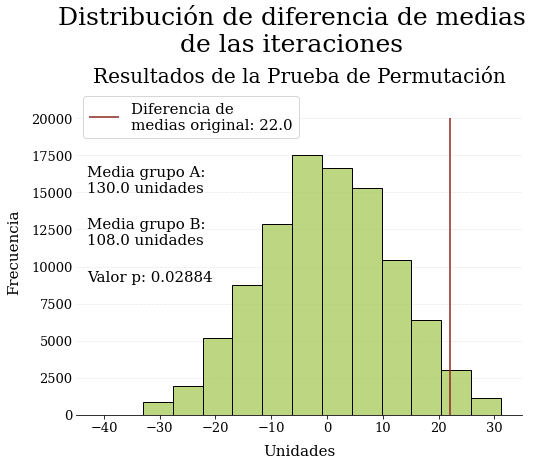

In [6]:
fig,ax= plt.subplots(figsize=(8,6),
#dpi=150
)

sns.histplot(x=diff_medias_permutation_test, bins=12, ax=ax, color='#A7C957')
ax.vlines(x=diff_medias, ymin=0, ymax=20000,
label='Diferencia de \nmedias original: {}'.format(diff_medias), 
colors='#8C271E')
ax.text(x=-43,y=15_000, s=f'Media grupo A:\n{data_A.mean()} unidades', fontdict=dict(size=15))
ax.text(x=-43,y=11_500, s=f'Media grupo B:\n{data_B.mean()} unidades', fontdict=dict(size=15))
ax.text(x=-43,y=9_000, s=f'Valor p: {pval}', fontdict=dict(size=15))

ax.set_xlim(-45,35)
ax.set_ylim(0,22000)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.grid(visible = True, axis='y', color='silver', alpha=1, ls=':', lw=0.5)


ax.legend(loc='upper left', prop=dict(size=15))
fig.suptitle('Distribución de diferencia de medias\nde las iteraciones', size=25, y=1.07)
ax.set_title('Resultados de la Prueba de Permutación', size=20)
ax.set_xlabel('Unidades', labelpad=10, size=15)
ax.set_ylabel('Frecuencia', labelpad=10, size=15)
ax.tick_params(axis='both', labelsize=13)